# Scikit-learn-Naive Bayes

### Naive Bayes: Probabalistic classifier based on bayes theorem. An advantage of naive Bayes is that it only requires a small amount of training data to estimate the parameters necessary for classification

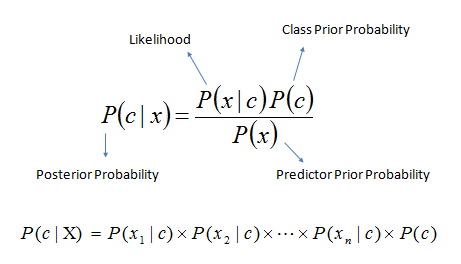

In [1]:
from IPython.display import Image
Image(filename='F:\\Data\\Mini Data Requests\\Bayes_rule.png')

### vertical bar = P(X|Y), read "the probability of X given Y".

In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import train_test_split
import numpy as np
import pandas as pd

In [3]:
# Read in File
Iris = pd.read_csv('R:\\Data\\cs\\Advanced Metering\\CHM\\PsuedoDataForCode\\Iris.csv')

# transform into matrix
Matrix = Iris.values

# Select our features (predictors)
MatrixFeatures = Matrix[:,[0,1,2,3]]
# Select our target
MatrixTarget = Matrix[:,[4]]

In [4]:
a_train, a_test, b_train, b_test = train_test_split(MatrixFeatures, MatrixTarget, test_size=0.75)
print "a_train" + str(a_train.shape)
print "a_test" + str( a_test.shape)
print ""
print "b_train" + str( b_train.shape)
print "b_test" + str(b_test.shape)

a_train(37L, 4L)
a_test(113L, 4L)

b_train(37L, 1L)
b_test(113L, 1L)


In [5]:
gnb = GaussianNB()
gnb.fit(a_train,np.ravel(b_train))
Z = gnb.predict(a_test)

In [6]:
df = pd.DataFrame(Z) 
df =df.reset_index()
df1 = pd.DataFrame(b_test) 
df1 =df1.reset_index()
merged = df.merge(df1,on='index') 

In [7]:
merged.rename(columns={'0_x':'Pred'}, inplace=True)
merged.rename(columns={'0_y':'Actual'}, inplace=True)
pd.crosstab(merged.Pred, merged.Actual).apply(lambda r: r/r.sum(), axis=1)

Actual,setosa,versicolor,virginica
Pred,,,
setosa,1,0.000000,0.000000
versicolor,0,0.883721,0.116279
virginica,0,0.029412,0.970588


In [8]:
pd.crosstab(merged.Pred, merged.Actual)

Actual,setosa,versicolor,virginica
Pred,,,
setosa,36,0,0
versicolor,0,38,5
virginica,0,1,33
